In [1]:
import pandas as pd
import numpy  as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# 집
pwd_folder  = 'C:/Users/wl/Desktop/◆◆◆원 드라이브◆◆◆/OneDrive - 연세대학교 (Yonsei University)/1 able택/2 작업일지/221122, 221123/'
save_folder = 'C:/Users/wl/Desktop/◆◆◆원 드라이브◆◆◆/OneDrive - 연세대학교 (Yonsei University)/1 able택/2 작업일지/221122, 221123/'

# #노트북)
# pwd_folder  = 'C:/Users/wL/OneDrive - 연세대학교 (Yonsei University)/3. 자연어 중간보고서/코드/'
# save_folder = 'C:/Users/wL/OneDrive - 연세대학교 (Yonsei University)/3. 자연어 중간보고서/코드/'

In [3]:
temp         = pd.read_excel(pwd_folder + 'master table_final2(motivation 수정).xlsx')
student_list = temp[['adtm_total','tlp_motivation', 'tlp_attitude', 'tlp_strategy', 'tlp_fear']]
student_list

,adtm_total,tlp_motivation,tlp_attitude,tlp_strategy,tlp_fear
0,0.175439,0.790812,NaN,NaN,0.282883
1,0.163743,0.628632,NaN,NaN,0.667117
2,0.216374,0.642664,NaN,NaN,0.363213
3,0.622807,0.648718,NaN,NaN,0.454655
4,0.505848,0.567593,NaN,NaN,0.450901
...,...,...,...,...,...
1897,0.429825,0.265005,0.183333,0.422000,0.112818
1898,0.122807,0.521957,0.819333,0.606667,0.215171
1899,0.377193,0.286279,0.264000,0.211333,0.331944
1900,0.286550,0.526251,0.839333,0.471333,0.195093


In [4]:
student_list.isna().sum()

adtm_total           0
tlp_motivation       0
tlp_attitude      1530
tlp_strategy      1530
tlp_fear             0
dtype: int64

In [5]:
student_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adtm_total      1902 non-null   float64
 1   tlp_motivation  1902 non-null   float64
 2   tlp_attitude    372 non-null    float64
 3   tlp_strategy    372 non-null    float64
 4   tlp_fear        1902 non-null   float64
dtypes: float64(5)
memory usage: 74.4 KB


In [6]:
student_list.describe()

,adtm_total,tlp_motivation,tlp_attitude,tlp_strategy,tlp_fear
count,1902.000000,1902.000000,372.000000,372.000000,1902.000000
mean,0.471009,0.596814,0.515518,0.567522,0.367522
std,0.186297,0.132071,0.190526,0.164497,0.164587
min,0.000000,0.150000,0.016667,0.000000,0.000000
25%,0.333333,0.513889,0.397000,0.462667,0.240240
50%,0.473684,0.591987,0.520000,0.557000,0.364185
75%,0.614035,0.687001,0.628500,0.667167,0.482883
max,1.000000,0.992921,1.000000,1.000000,0.906156


# 전체 상관관계 비교 (adtm 전체점수 - tlp 결과)

In [7]:
student_list.corr()

,adtm_total,tlp_motivation,tlp_attitude,tlp_strategy,tlp_fear
adtm_total,1.000000,0.236516,-0.023917,0.024243,-0.162608
tlp_motivation,0.236516,1.000000,0.591829,0.602606,-0.315961
tlp_attitude,-0.023917,0.591829,1.000000,0.718140,-0.275962
tlp_strategy,0.024243,0.602606,0.718140,1.000000,-0.134008
tlp_fear,-0.162608,-0.315961,-0.275962,-0.134008,1.000000


# 상관관계 비교(세부)

# student_list1(strategy, attitude)

In [8]:
# strategy, attitude 널값 존재하여 분리해서 실행
student_list1 = student_list[['adtm_total','tlp_attitude', 'tlp_strategy' ]]
student_list1

,adtm_total,tlp_attitude,tlp_strategy
0,0.175439,NaN,NaN
1,0.163743,NaN,NaN
2,0.216374,NaN,NaN
3,0.622807,NaN,NaN
4,0.505848,NaN,NaN
...,...,...,...
1897,0.429825,0.183333,0.422000
1898,0.122807,0.819333,0.606667
1899,0.377193,0.264000,0.211333
1900,0.286550,0.839333,0.471333


In [9]:
# 널값 제거
student_list1=student_list1.dropna()
student_list1

,adtm_total,tlp_attitude,tlp_strategy
173,0.543860,0.803333,0.888667
287,0.438596,0.489333,0.713333
336,0.654971,0.121333,0.362667
337,0.178363,0.255333,0.388667
346,0.470760,0.216000,0.384667
...,...,...,...
1897,0.429825,0.183333,0.422000
1898,0.122807,0.819333,0.606667
1899,0.377193,0.264000,0.211333
1900,0.286550,0.839333,0.471333


In [10]:
df_corr1 = student_list1.corr()
df_corr1

,adtm_total,tlp_attitude,tlp_strategy
adtm_total,1.000000,-0.023917,0.024243
tlp_attitude,-0.023917,1.000000,0.718140
tlp_strategy,0.024243,0.718140,1.000000


<AxesSubplot:>

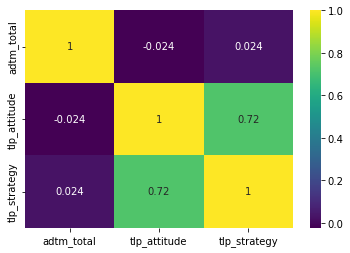

In [11]:
# correlation은 인과관계 확인이 아니므로 양,음의 상관관계 정도만 먼저 확인
sns.heatmap(df_corr1, cmap='viridis', annot=True)

# student_list2(motivation, fear)

In [12]:
student_list2 = student_list[['adtm_total','tlp_motivation', 'tlp_fear' ]]
student_list2

,adtm_total,tlp_motivation,tlp_fear
0,0.175439,0.790812,0.282883
1,0.163743,0.628632,0.667117
2,0.216374,0.642664,0.363213
3,0.622807,0.648718,0.454655
4,0.505848,0.567593,0.450901
...,...,...,...
1897,0.429825,0.265005,0.112818
1898,0.122807,0.521957,0.215171
1899,0.377193,0.286279,0.331944
1900,0.286550,0.526251,0.195093


In [13]:
df_corr2 = student_list2.corr()
df_corr2

,adtm_total,tlp_motivation,tlp_fear
adtm_total,1.000000,0.236516,-0.162608
tlp_motivation,0.236516,1.000000,-0.315961
tlp_fear,-0.162608,-0.315961,1.000000


<AxesSubplot:>

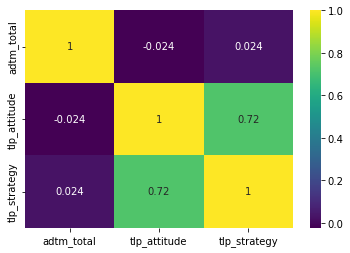

In [14]:
# correlation은 인과관계 확인이 아니므로 양,음의 상관관계 정도만 먼저 확인 
sns.heatmap(df_corr1, cmap='viridis', annot=True)

In [15]:
# 상관관계 설명
# https://gomguard.tistory.com/173

In [16]:
#======================================================================================

# 1. 선형회귀분석(adtm_total, tlp_motivation)

In [17]:
student_list2

,adtm_total,tlp_motivation,tlp_fear
0,0.175439,0.790812,0.282883
1,0.163743,0.628632,0.667117
2,0.216374,0.642664,0.363213
3,0.622807,0.648718,0.454655
4,0.505848,0.567593,0.450901
...,...,...,...
1897,0.429825,0.265005,0.112818
1898,0.122807,0.521957,0.215171
1899,0.377193,0.286279,0.331944
1900,0.286550,0.526251,0.195093


In [18]:
a=student_list2[['adtm_total','tlp_motivation']]
a

,adtm_total,tlp_motivation
0,0.175439,0.790812
1,0.163743,0.628632
2,0.216374,0.642664
3,0.622807,0.648718
4,0.505848,0.567593
...,...,...
1897,0.429825,0.265005
1898,0.122807,0.521957
1899,0.377193,0.286279
1900,0.286550,0.526251


In [19]:
#1
import patsy
import statsmodels.api as sm

f = 'adtm_total~ tlp_motivation'
y, X = patsy.dmatrices(f, a, return_type='dataframe')

In [20]:
y

,adtm_total
0,0.175439
1,0.163743
2,0.216374
3,0.622807
4,0.505848
...,...
1897,0.429825
1898,0.122807
1899,0.377193
1900,0.286550


In [21]:
X

,Intercept,tlp_motivation
0,1.0,0.790812
1,1.0,0.628632
2,1.0,0.642664
3,1.0,0.648718
4,1.0,0.567593
...,...,...
1897,1.0,0.265005
1898,1.0,0.521957
1899,1.0,0.286279
1900,1.0,0.526251


In [22]:
model1 = sm.OLS(y, X).fit()
print(model1.summary())

# Prob(F-statistics) : 이 모델의 유의미성 검증 결과. 보통 0.05보다 작으면 유의미합니다.
# Adj.R-squred : 보통 설명력이라고 말하는 값인데 주어진 데이터를 현재 모델이 얼마나 잘 설명하고 있는지를 나타내는 지수입니다. 
# 1에 가까울수록 설명력이 좋다고 판단합니다. 
# 서로 다른 모델을 비교할 때는 이 값이 높은 쪽을 선택할 수 있습니다.

                            OLS Regression Results                            
Dep. Variable:             adtm_total   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           1.36e-25
Time:                        17:29:46   Log-Likelihood:                 552.57
No. Observations:                1902   AIC:                            -1101.
Df Residuals:                    1900   BIC:                            -1090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2719      0.019     14.

In [23]:
model1.predict([1,0.9])*100

array([57.21596323])

In [24]:
#2
import statsmodels.formula.api as sm 
model1_2 = sm.ols(formula = 'adtm_total ~ tlp_motivation',data=a).fit() 
print(model1_2.summary())

                            OLS Regression Results                            
Dep. Variable:             adtm_total   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           1.36e-25
Time:                        17:30:59   Log-Likelihood:                 552.57
No. Observations:                1902   AIC:                            -1101.
Df Residuals:                    1900   BIC:                            -1090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2719      0.019     14.

# 2. 선형회귀분석(adtm_total, tlp_fear)

In [25]:
b=student_list2[['adtm_total','tlp_fear']]
b

,adtm_total,tlp_fear
0,0.175439,0.282883
1,0.163743,0.667117
2,0.216374,0.363213
3,0.622807,0.454655
4,0.505848,0.450901
...,...,...
1897,0.429825,0.112818
1898,0.122807,0.215171
1899,0.377193,0.331944
1900,0.286550,0.195093


In [26]:
import patsy
import statsmodels.api as sm
f = 'adtm_total~ tlp_fear'
y, X = patsy.dmatrices(f, b, return_type='dataframe')

In [27]:
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             adtm_total   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     51.60
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           9.71e-13
Time:                        17:31:19   Log-Likelihood:                 523.31
No. Observations:                1902   AIC:                            -1043.
Df Residuals:                    1900   BIC:                            -1032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5387      0.010     52.209      0.0

In [28]:
model2.predict([1, 0.9])*100

array([37.30034463])

# 3. 선형회귀분석(adtm_total, tlp_attitude)

In [29]:
student_list1

,adtm_total,tlp_attitude,tlp_strategy
173,0.543860,0.803333,0.888667
287,0.438596,0.489333,0.713333
336,0.654971,0.121333,0.362667
337,0.178363,0.255333,0.388667
346,0.470760,0.216000,0.384667
...,...,...,...
1897,0.429825,0.183333,0.422000
1898,0.122807,0.819333,0.606667
1899,0.377193,0.264000,0.211333
1900,0.286550,0.839333,0.471333


In [30]:
c=student_list1[['adtm_total','tlp_attitude']]
c

,adtm_total,tlp_attitude
173,0.543860,0.803333
287,0.438596,0.489333
336,0.654971,0.121333
337,0.178363,0.255333
346,0.470760,0.216000
...,...,...
1897,0.429825,0.183333
1898,0.122807,0.819333
1899,0.377193,0.264000
1900,0.286550,0.839333


In [31]:
import patsy
import statsmodels.api as sm
f = 'adtm_total~ tlp_attitude'
y, X = patsy.dmatrices(f, c, return_type='dataframe')

model3 = sm.OLS(y, X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             adtm_total   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2118
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.646
Time:                        17:31:36   Log-Likelihood:                 83.821
No. Observations:                 372   AIC:                            -163.6
Df Residuals:                     370   BIC:                            -155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4678      0.029     16.130   

In [32]:
model3.predict([1, 0.9])*100

array([44.59221746])

# 4. 선형회귀분석(adtm_total, tlp_strategy)

In [33]:
d=student_list1[['adtm_total','tlp_strategy']]
d

,adtm_total,tlp_strategy
173,0.543860,0.888667
287,0.438596,0.713333
336,0.654971,0.362667
337,0.178363,0.388667
346,0.470760,0.384667
...,...,...
1897,0.429825,0.422000
1898,0.122807,0.606667
1899,0.377193,0.211333
1900,0.286550,0.471333


In [34]:
import patsy
import statsmodels.api as sm
f = 'adtm_total~ tlp_strategy'
y, X = patsy.dmatrices(f, d, return_type='dataframe')

model4 = sm.OLS(y, X).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:             adtm_total   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2176
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.641
Time:                        17:31:56   Log-Likelihood:                 83.824
No. Observations:                 372   AIC:                            -163.6
Df Residuals:                     370   BIC:                            -155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4391      0.036     12.158   

In [35]:
model4.predict([1, 0.9])*100

array([46.47400813])

# p-value 종합 결과

In [36]:
names = ['tlp_motivation', 'tlp_fear', 'tlp_attitude', 'tlp_strategy']

for i in range(1,5):
    print(names[i-1], 'p-value : ', eval('model' + str(i)).pvalues[1])

tlp_motivation p-value :  1.3632202588185712e-25
tlp_fear p-value :  9.713112221887087e-13
tlp_attitude p-value :  0.6456512512505916
tlp_strategy p-value :  0.6411565947826462
